In [21]:
from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.hedges import very
from fuzzylogic.functions import R, S, bounded_sigmoid

# Wind Speed
### Three fuzzy sets are defined within this domain: "low", "high", and "medium". These sets represent different categories of wind speed.  
* "low": This set is defined using an S-shaped membership function, S(0, 10). This means that wind speeds close to 0 km/h have a high degree of membership in the "low" set, and this membership decreases as the wind speed increases, becoming 0 at 10 km/h and above. The "low" set is used to represent wind speeds that are considered low.  
* "high": This set is defined using a reversed S-shaped membership function, R(10, 20). This means that wind speeds close to 20 km/h have a high degree of membership in the "high" set, and this membership decreases as the wind speed decreases, becoming 0 at 10 km/h and below. The "high" set is used to represent wind speeds that are considered high.  
* "medium": This set is defined as the complement of both "low" and "high". This means that a wind speed is considered "medium" if it is neither "low" nor "high". The "medium" set is used to represent wind speeds that are considered medium.  

The names "low", "medium", and "high" have been chosen because they are intuitive and easy to understand. They represent common categories that people might use to describe wind speed. The exact boundaries of these categories (i.e., the parameters of the membership functions) have been chosen based on the specific needs of the system.

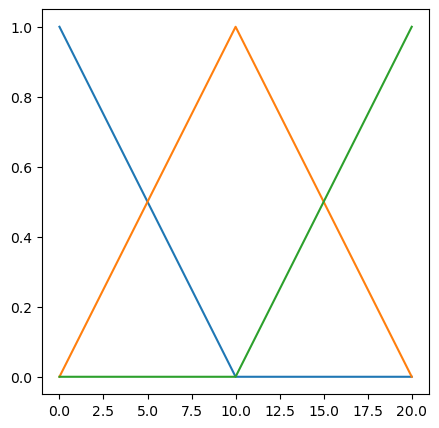

In [16]:
wind = Domain("Wind(km/h)", 0, 20)
# define the sets
wind.low = S(0, 10)
wind.high = R(10, 20)
wind.medium = ~wind.low & ~wind.high

# plot the sets
wind.low.plot()
wind.medium.plot()
wind.high.plot()

# Rainfall Amount
* "low": This set is defined using an S-shaped membership function, S(0, 30). This means that rainfall amounts close to 0 mm have a high degree of membership in the "low" set, and this membership decreases as the rainfall amount increases, becoming 0 at 30 mm and above. The "low" set is used to represent rainfall amounts that are considered low.  
* "high": This set is defined using a reversed S-shaped membership function, R(30, 100). This means that rainfall amounts close to 100 mm have a high degree of membership in the "high" set, and this membership decreases as the rainfall amount decreases, becoming 0 at 30 mm and below. The "high" set is used to represent rainfall amounts that are considered high.  
* "medium": This set is defined as the complement of both "low" and "high". This means that a rainfall amount is considered "medium" if it is neither "low" nor "high". The "medium" set is used to represent rainfall amounts that are considered medium.

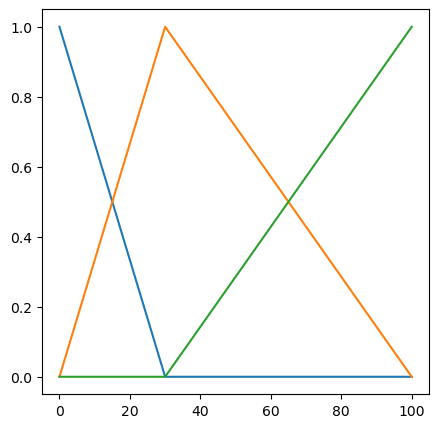

In [19]:
rainfall = Domain("Rainfall(mm)", 0, 100)

# define the sets
rainfall.low = S(0, 30)
rainfall.high = R(30, 100)
rainfall.medium = ~rainfall.low & ~rainfall.high

# plot the sets
rainfall.low.plot()
rainfall.medium.plot()
rainfall.high.plot()

# Weather Condition
Three fuzzy sets are defined within this domain: "nice", "take_umbrella", and "dangerous". These sets represent different categories of weather.  
* "nice": This set is defined using an S-shaped membership function, S(0, 33). This means that weather scores close to 0 have a high degree of membership in the "nice" set, and this membership decreases as the weather score increases, becoming 0 at 33 and above. The "nice" set is used to represent weather conditions that are considered nice.  
* "take_umbrella": This set is defined using a bounded sigmoid membership function, bounded_sigmoid(33, 66). This means that weather scores around the midpoint of 33 and 66 have a high degree of membership in the "take_umbrella" set, and this membership decreases as the weather score moves away from this midpoint. The "take_umbrella" set is used to represent weather conditions where one might need to take an umbrella.  
* "dangerous": This set is defined using a reversed S-shaped membership function, R(66, 100). This means that weather scores close to 100 have a high degree of membership in the "dangerous" set, and this membership decreases as the weather score decreases, becoming 0 at 66 and below. The "dangerous" set is used to represent weather conditions that are considered dangerous.

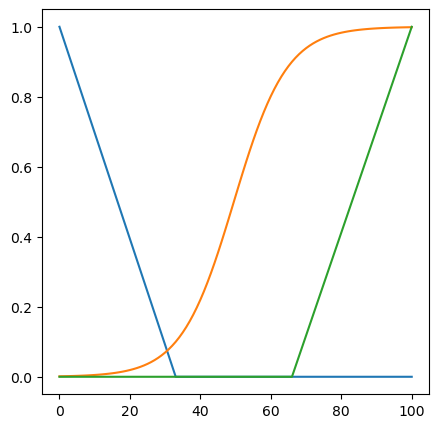

In [23]:
# Define a new domain for general weather
weather = Domain("Weather", 0, 100)

# Define the sets within the weather domain
weather.nice = S(0, 33)
weather.take_umbrella = bounded_sigmoid(33, 66)
weather.dangerous = R(66, 100)

# Plot the sets
weather.nice.plot()
weather.take_umbrella.plot()
weather.dangerous.plot()

In [26]:
# Define the rules
R1 = Rule({(wind.low, rainfall.low): weather.nice})
R2 = Rule({(wind.medium, rainfall.medium): weather.take_umbrella})
R3 = Rule({(wind.high, rainfall.high): weather.dangerous})

# Combine the rules
rules = R1 | R2 | R3

# Test the rules
values = {wind: 5, rainfall: 25}
print(R1(values), R2(values), R3(values), "=>", rules(values))


10.561056105610563 72.47664499759232 None => 56.99774777459688
